# Dados

Este trabalho prático foi realizado utilizando dados obtidos do site Kaggle. O dataset escolhido se chama Life Expectancy (WHO).

O repositório Global Health Observatory (GHO) é mantido pela World Health Organization (WHO) e acompanha a situação da saúde e fatores relacioandos de todos os países. Os datasets estão disponíveis para análise de dados sobre saúde.
O dataset de Expectativa de Vida reune dados sobre 193 países coletados pela WHO.<br>
Nos últimos 15 anos, o setor de saúde se desenvolveu muito, resultando em uma melhora na taxa de mortalidade. Essa diferença foi ainda mais evidente em países em desenvolvimento. Por esse motivo, o dataset contém dados de 2000 até 2015.<br>
O dataset é uma junção de vários outros datasets individuais que foram previamente tratados pelo criador. Utilizando o comando Missmap, ele identificou que a maioria dos dados faltantes eram de população, Hepatite B e Produto Interno Bruto (GDP).<br>
Os países com o maior número de dados faltantes são Vanuatu, Tonga, Togo, Cabo Verde. O criador do dataset decidiu excluí-los pela dificuldade de encontrar os dados.<br>

### Descrição das colunas
Formato: coluna (tipo) - descrição<br>
<br>
country (Nominal) - país<br>
year (Ordinal) - o ano da coleta dos indicadores (de 2000 a 2015)<br>
status (Nominal) - se um país é considerado 'Developing' (em desenvolvimento) ou 'Developed' (desenvolvido) pela WHO<br>
life_expectancy (taxa) - expectativa de vida<br>
adult_mortality (taxa) - taxa de mortalidade adulta por 1000 pessoas, ou seja, quantas pessoas entre 15 e 60 anos morrem a cada 1000<br>
infant_deaths (taxa) - taxa de mortalidade infantil por 1000 pessoas<br>
alcohol (taxa) - taxa de consumo de álcool em litros de álcool puro por pessoa<br>
percentage_expenditure (taxa) - porcentagem do PIB que é gasto com saúde<br>
hepatitis_b (taxa) - número de crianças de 1 ano imunizadas contra Hepatite B sobre número total de crianças de 1 ano<br>
measles (taxa) - taxa de casos de sarampo reportados por 1000 pessoas<br>
bmi (Interval/Ordinal) - média do Índice de Massa Corporal (IMC) da população<br>
under-five_deaths (taxa) - taxa de morte de crianças com menos de 5 anos por 1000 pessoas<br>
polio (taxa) - número de crianças de um 1 ano imunizadas contra Pólio sobre o número total de crianças de 1 ano<br>
total_expenditure (taxa) - porcentagem do gasto do governo com saúde (em relação ao gasto total)<br>
diphtheria (taxa) - número de crianças de 1 ano imunizadas contra difteria, tétano e coqueluche sobre o número total de crianças de 1 ano<br>
hiv/aids (taxa) - número de mortes de crianças até 5 anos causadas por HIV/AIDS por 1000 nascidos vivos<br>
gdp (taxa) - Produto Interno Bruto (PIB) per capita<br>
population (taxa) - população<br>
thinness_1-19_years (taxa) - taxa de magreza sobre pessoas de 10 a 19 anos<br>
thinness_5-9_years (taxa) - taxa de magreza sobre pessoas de 5 a 9 anos<br>
income_composition_of_resources (taxa) - Índice de Desenvolvimento Humano em termos da composição da renda<br>
schooling (taxa) - média do número de anos de escolaridade<br>

In [35]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [36]:
expectativa_de_vida = pd.read_csv('./Life Expectancy Data.csv', delimiter=',')
expectativa_de_vida.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Limpeza dos Dados

Apesar de ser uma base relativamente limpa, vamos corrigir o nome das colunas e remover dados que não são relevantes para nossas questões.

In [37]:
colunas_originais = list(expectativa_de_vida.columns)
colunas_novas = []
for col in colunas_originais:
    colunas_novas.append(col.strip().replace('  ', ' ').replace(' ', '_').lower())
expectativa_de_vida.columns = colunas_novas

In [38]:
expectativa_de_vida = expectativa_de_vida[[
    'country',
    'year',
    'life_expectancy',
    'adult_mortality',
    'infant_deaths',
    'alcohol',
    'hepatitis_b',
    'measles',
    'under-five_deaths',
    'polio',
    'diphtheria',
    'population',
    'schooling'
]]

Vamos analisar os dados faltantes agora. Primeiramente, precisamos identificá-los. Depois, devemos nos perguntar: "Esse valor poderia ser algo além de null? Talvez 0?"<br>
"Devemos remover ou preencher os valores null?"

Além disso, existe a possibilidade de existirem valores errôneos. Vamos analisar a tabela a seguir:

In [39]:
expectativa_de_vida.describe().iloc[:, 1:]

,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,under-five_deaths,polio,diphtheria,population,schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2938.000000,2919.000000,2919.000000,2.286000e+03,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,80.940461,2419.592240,42.035739,82.550188,82.324084,1.275338e+07,11.992793
std,9.523867,124.292079,117.926501,4.052413,25.070016,11467.272489,160.445548,23.428046,23.716912,6.101210e+07,3.358920
min,36.300000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,3.000000,2.000000,3.400000e+01,0.000000
25%,63.100000,74.000000,0.000000,0.877500,77.000000,0.000000,0.000000,78.000000,78.000000,1.957932e+05,10.100000
50%,72.100000,144.000000,3.000000,3.755000,92.000000,17.000000,4.000000,93.000000,93.000000,1.386542e+06,12.300000
75%,75.700000,228.000000,22.000000,7.702500,97.000000,360.250000,28.000000,97.000000,97.000000,7.420359e+06,14.300000
max,89.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,2500.000000,99.000000,99.000000,1.293859e+09,20.700000


É possível ver alguns valores estranhos:<br>
<ul>
    <li>adult_mortality com valor mínimo de 1.0 é improvável</li>
    <li>infant_deaths com valor máximo de 1800 e mínimo de 0, valores muito improváveis</li>
    <li>under-five_deaths com valores igualmente improváveis</li>
    <li>population com valor mínimo de 34 pessoas</li>
</ul>

Vamos visualizar melhor:

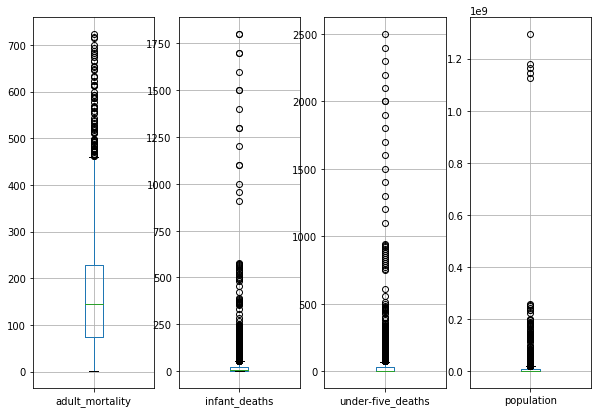

In [40]:
plt.figure(figsize=(10,15))
for i, col in enumerate(['adult_mortality', 'infant_deaths', 'under-five_deaths', 'population'], start=1):
    plt.subplot(2, 4, i)
    expectativa_de_vida.boxplot(col)

Vamos mudar para null valores que aparentam ser erros, como por exemplo:
<ul>
    <li>adult_mortality com valores abaixo do 5o percentil</li>
    <li>infant_deaths com valor 0</li>
    <li>under-five_deaths com valor 0</li>
</ul>

In [41]:
mortalidade_abaixo_5_percentil = np.percentile(expectativa_de_vida.adult_mortality.dropna(), 5)
expectativa_de_vida.adult_mortality = expectativa_de_vida.apply(lambda x: np.nan if x.adult_mortality < mortalidade_abaixo_5_percentil else x.adult_mortality, axis=1)
expectativa_de_vida.infant_deaths = expectativa_de_vida.infant_deaths.replace(0, np.nan)
expectativa_de_vida['under-five_deaths'] = expectativa_de_vida['under-five_deaths'].replace(0, np.nan)

Como esse dataset representa várias séries temporais por país, vamos preencher os valores nulos com a média de cada ano, por país.

In [42]:
novos_dados = []
for ano in list(expectativa_de_vida.year.unique()):
    dados_por_ano = expectativa_de_vida[expectativa_de_vida.year == ano].copy()
    for col in list(dados_por_ano.columns)[3:]:
        dados_por_ano[col] = dados_por_ano[col].fillna(dados_por_ano[col].dropna().mean()).copy()
    novos_dados.append(dados_por_ano)
expectativa_de_vida = pd.concat(novos_dados).copy()

In [45]:
expectativa_de_vida.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,hepatitis_b,measles,under-five_deaths,polio,diphtheria,population,schooling
count,2938.000000,2928.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000
mean,2007.518720,69.224932,172.924761,42.458242,4.644013,80.322757,2419.592240,57.191600,82.536808,82.305166,1.275499e+07,11.993407
std,4.613841,9.523867,118.847313,116.366814,3.919849,22.682329,11467.272489,158.481956,23.353973,23.642961,5.384718e+07,3.268724
min,2000.000000,36.300000,13.000000,1.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,3.400000e+01,0.000000
25%,2004.000000,63.100000,84.000000,4.000000,1.092500,74.099237,0.000000,4.000000,78.000000,78.000000,4.189172e+05,10.300000
50%,2008.000000,72.100000,157.000000,28.000000,4.140000,87.000000,17.000000,34.000000,93.000000,93.000000,3.675929e+06,12.300000
75%,2012.000000,75.700000,227.000000,43.766917,7.390000,96.000000,360.250000,60.014815,97.000000,97.000000,1.181332e+07,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,2500.000000,99.000000,99.000000,1.293859e+09,20.700000


# Análise Exploratória